## 1. Notebook Initialization

In [1]:
import pandas as pd
import seaborn as sbn
import matplotlib.pyplot as plt
import numpy as np
import datetime as dt
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MaxAbsScaler
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from random import randint

In [2]:
# Opciones de pandas
rows, cols = 400, 100
pd.set_option("display.max.columns", cols)
pd.set_option("display.max.rows", rows)
# Rutas
PATH = "../../data/fundamental_data/"

## 2. Preliminar Tests

In [11]:
data = pd.read_csv(PATH+'IBM_Manual_dataset.csv', header=0, index_col=0, low_memory=False)
data.sort_index(ascending=True, inplace=True)
#data.set_index(pd.DatetimeIndex(list(data.index)).strftime('%Y-%m'), inplace=True)
data

,FCF,PricePerShare,ROE,QMonth,Prediction
1985-03,-1.232322,-1.079314,-0.669004,-1.336060,13.035309
1985-06,-1.232322,-1.084088,-0.669004,-0.439081,13.160484
1985-09,-1.232322,-1.081432,-0.669004,0.457899,16.657703
1985-12,-1.232322,-1.007231,-0.669004,1.354878,16.345213
1986-03,-1.232322,-1.013861,-0.669004,-1.336060,15.921562
1986-06,-1.232322,-1.022850,-0.669004,-0.439081,14.741072
1986-09,-1.232322,-1.047896,-0.669004,0.457899,13.267827
1986-12,-1.232322,-1.079154,-0.669004,1.354878,16.734827
1987-03,-1.232322,-1.005595,-0.669004,-1.336060,18.234604
1987-06,-1.232322,-0.973774,-0.669004,-0.439081,17.033018


In [12]:
X_scaled = np.array(data.drop(['Prediction'], axis=1))
y_scaled = np.array(data['Prediction'])

In [13]:
# Split the data into 80% training and 20% testing
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_scaled, test_size=0.2)
y_train = y_train.ravel()
y_test = y_test.ravel()

In [15]:
mlp = GridSearchCV(MLPRegressor(max_iter=100000),
                   param_grid={"hidden_layer_sizes": [(5,), (10,), (20,), (30,), (50,)],
                               "activation": ['identity', 'logistic', 'tanh', 'relu'],
                               "solver": ['sgd', 'adam']
                              },
                   scoring="neg_root_mean_squared_error"
)

In [16]:
# Create and train the Support Vector Machine (Regressor) 
#svr = svr = SVR(kernel='rbf', C=14.0, gamma=0.03, epsilon=0.4)
#svr = SVR(kernel='rbf', C=200, gamma=0.98, epsilon=0.05)
mlp.fit(X_train, y_train)

GridSearchCV(estimator=MLPRegressor(max_iter=100000),
             param_grid={'activation': ['identity', 'logistic', 'tanh', 'relu'],
                         'hidden_layer_sizes': [(5,), (10,), (20,), (30,),
                                                (50,)],
                         'solver': ['sgd', 'adam']},
             scoring='neg_root_mean_squared_error')

In [17]:
mlp.best_params_

{'activation': 'identity', 'hidden_layer_sizes': (50,), 'solver': 'sgd'}

In [ ]:
HOLDOUT = 10
params = dict()
for i in range(HOLDOUT):
    # Split the data into 80% training and 20% testing
    X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_scaled, test_size=0.2, random_state=i)
    y_train = y_train.ravel()
    y_test = y_test.ravel()
    # Train model
    mlp.fit(X_train, y_train)
    # Get best params
    param = str(mlp.best_params_)
    if param in list(params.keys()):
        params[param]['count'] += 1
        params[param]['train_score'].append(mlp.score(X_train, y_train))
        params[param]['test_score'].append(mlp.score(X_test, y_test))
        params[param]['random_seeds'].append(i)
    else:
        params[param] = {'count':1, 'train_score':[mlp.score(X_train, y_train)], 'test_score':[mlp.score(X_test, y_test)], 'random_seeds':[i]}
for key in (params.keys()):
    print('Params={}\nCount:{}\nTrain_Score:{}\nTest_Score:{}\nRandom_Seeds:{}\n\n'.format(key,params[key]['count'], np.mean(params[key]['train_score']), np.mean(params[key]['test_score']), str(params[key]['random_seeds'])))

/home/geff/miniconda3/envs/tesis/lib/python3.6/site-packages/sklearn/neural_network/_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/home/geff/miniconda3/envs/tesis/lib/python3.6/site-packages/sklearn/neural_network/_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/home/geff/miniconda3/envs/tesis/lib/python3.6/site-packages/sklearn/neural_network/_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/home/geff/miniconda3/envs/tesis/lib/python3.6/site-packages/sklearn/neural_network/_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1

/home/geff/miniconda3/envs/tesis/lib/python3.6/site-packages/sklearn/neural_network/_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/home/geff/miniconda3/envs/tesis/lib/python3.6/site-packages/sklearn/neural_network/_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/home/geff/miniconda3/envs/tesis/lib/python3.6/site-packages/sklearn/neural_network/_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/home/geff/miniconda3/envs/tesis/lib/python3.6/site-packages/sklearn/neural_network/_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1

/home/geff/miniconda3/envs/tesis/lib/python3.6/site-packages/sklearn/neural_network/_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/home/geff/miniconda3/envs/tesis/lib/python3.6/site-packages/sklearn/neural_network/_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/home/geff/miniconda3/envs/tesis/lib/python3.6/site-packages/sklearn/neural_network/_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/home/geff/miniconda3/envs/tesis/lib/python3.6/site-packages/sklearn/neural_network/_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1

/home/geff/miniconda3/envs/tesis/lib/python3.6/site-packages/sklearn/neural_network/_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/home/geff/miniconda3/envs/tesis/lib/python3.6/site-packages/sklearn/neural_network/_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/home/geff/miniconda3/envs/tesis/lib/python3.6/site-packages/sklearn/neural_network/_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/home/geff/miniconda3/envs/tesis/lib/python3.6/site-packages/sklearn/neural_network/_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1

/home/geff/miniconda3/envs/tesis/lib/python3.6/site-packages/sklearn/neural_network/_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/home/geff/miniconda3/envs/tesis/lib/python3.6/site-packages/sklearn/neural_network/_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/home/geff/miniconda3/envs/tesis/lib/python3.6/site-packages/sklearn/neural_network/_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/home/geff/miniconda3/envs/tesis/lib/python3.6/site-packages/sklearn/neural_network/_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1

/home/geff/miniconda3/envs/tesis/lib/python3.6/site-packages/sklearn/neural_network/_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/home/geff/miniconda3/envs/tesis/lib/python3.6/site-packages/sklearn/neural_network/_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/home/geff/miniconda3/envs/tesis/lib/python3.6/site-packages/sklearn/neural_network/_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/home/geff/miniconda3/envs/tesis/lib/python3.6/site-packages/sklearn/neural_network/_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1

/home/geff/miniconda3/envs/tesis/lib/python3.6/site-packages/sklearn/neural_network/_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/home/geff/miniconda3/envs/tesis/lib/python3.6/site-packages/sklearn/neural_network/_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/home/geff/miniconda3/envs/tesis/lib/python3.6/site-packages/sklearn/neural_network/_multilayer_perceptron.py:587: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


In [18]:
#Results log
Params={'activation': 'identity', 'hidden_layer_sizes': 50, 'solver': 'sgd'}
#Params={'activation': 'logistic', 'hidden_layer_sizes': 50, 'solver': 'sgd'}
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_scaled, test_size=0.2)
y_train = y_train.ravel()
y_test = y_test.ravel()
mlp = MLPRegressor(activation=Params['activation'], hidden_layer_sizes=Params['hidden_layer_sizes'], solver=Params['solver'])
mlp.fit(X_train, y_train)

MLPRegressor(activation='identity', hidden_layer_sizes=50, solver='sgd')

In [19]:
mlp.score(X_train, y_train)

0.9705933668068685

In [20]:
mlp.score(X_test, y_test)

0.9708939689582411

In [13]:
mean_squared_error(y_test, mlp.predict(X_test), squared=False)

9.677131210768655

In [149]:
#abs_sc_predict.inverse_transform(svr.predict(X_pred_scaled).reshape(1,-1))
sc_predict.inverse_transform(mlp.predict(X_scaled[-1:, :]))

array([71.34155587])

In [166]:
#abs_sc_predict.inverse_transform(y_scaled[-1:, :])
sc_predict.inverse_transform(y_scaled[-1:, :])

array([[115.6105423]])

In [246]:
X_pred_scaled[:,-1]

array([1.53023942, 1.68216111, 1.68716952, 1.69217793])

In [247]:
X_scaled[:,-1]

array([-1.65677714, -1.65176873, -1.64676032, -1.64175192, -1.48983023,
       -1.48482182, -1.47981341, -1.474805  , -1.32288331, -1.31787491,
       -1.3128665 , -1.30785809, -1.1559364 , -1.15092799, -1.14591959,
       -1.14091118, -0.98898949, -0.98398108, -0.97897267, -0.97396427,
       -0.82204258, -0.81703417, -0.81202576, -0.80701735, -0.65509566,
       -0.65008726, -0.64507885, -0.64007044, -0.48814875, -0.48314034,
       -0.47813193, -0.47312353, -0.32120184, -0.31619343, -0.31118502,
       -0.30617661, -0.15425492, -0.14924652, -0.14423811, -0.1392297 ,
        0.01269199,  0.0177004 ,  0.0227088 ,  0.02771721,  0.1796389 ,
        0.18464731,  0.18965572,  0.19466412,  0.34658581,  0.35159422,
        0.35660263,  0.36161104,  0.51353273,  0.51854113,  0.52354954,
        0.52855795,  0.68047964,  0.68548805,  0.69049645,  0.69550486,
        0.84742655,  0.85243496,  0.85744337,  0.86245177,  1.01437346,
        1.01938187,  1.02439028,  1.02939869,  1.18132038,  1.18

In [21]:
PRED = mlp.predict(X_scaled)

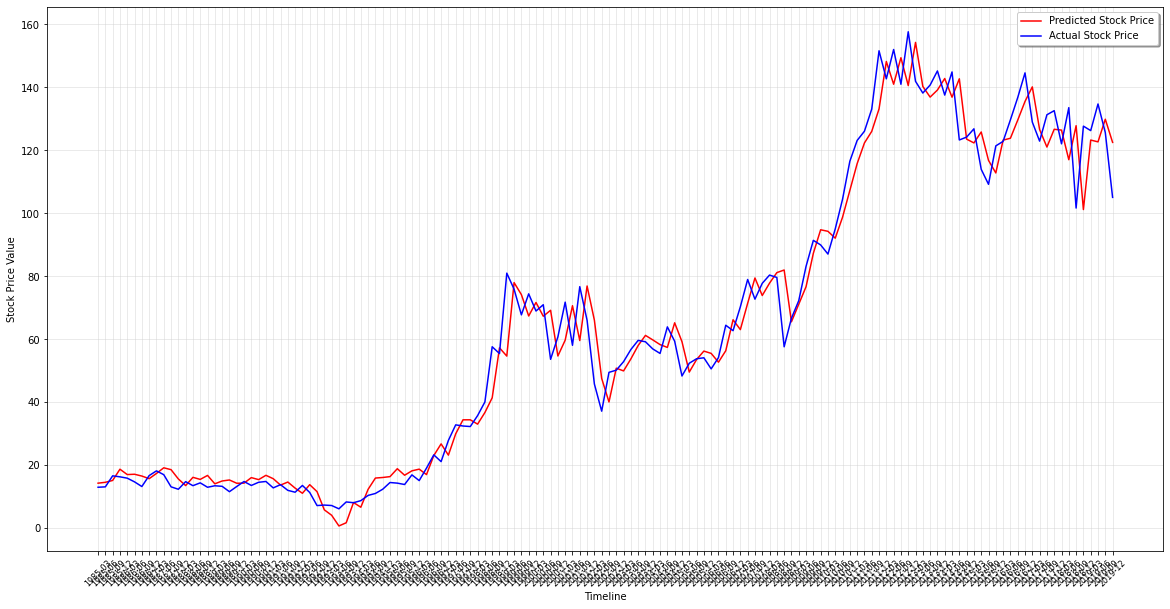

RMSE 8.072164578242186
R2-score test: 0.9708939689582411
R2-score_adj test: 0.9660429637846146
RMSE test: 7.782559419970437
MAE test: 5.130039818445255


In [22]:
#params = str(Params)
# Chage on attributes and no change on PricePerShare
# Reduced attributes v2
# TSCO

# Plot parameters
START_DATE_FOR_PLOTTING = '1985-03'
ENDING_DATE_FOR_PLOTTING = '2020-03'
START_INDEX = data.index.get_loc(START_DATE_FOR_PLOTTING)
ENDING_INDEX = data.index.get_loc(ENDING_DATE_FOR_PLOTTING)
fig1,ax1 = plt.subplots(figsize=(20,10))


plt.plot(data.index[START_INDEX:ENDING_INDEX], PRED[START_INDEX:ENDING_INDEX], color='red', label='Predicted Stock Price')
plt.plot(data.index[START_INDEX:ENDING_INDEX], y_scaled[START_INDEX:ENDING_INDEX], color='b', label='Actual Stock Price')

#plt.axvline(x = data.index[-5], color='green', linewidth=2, linestyle='--')

plt.grid(which='major', color='#cccccc', alpha=0.5)

plt.legend(shadow=True)
#plt.title(params, family='DejaVu Sans', fontsize=12)
plt.xlabel('Timeline', family='DejaVu Sans', fontsize=10)
plt.ylabel('Stock Price Value', family='DejaVu Sans', fontsize=10)
plt.xticks(rotation=45, fontsize=8)
plt.show()

print("RMSE",mean_squared_error(y_scaled, PRED, squared=False))
print("R2-score test:",r2_score(y_test, mlp.predict(X_test)))
print("R2-score_adj test:",1-(1-r2_score(y_test, mlp.predict(X_test)))*(len(y_test)-1)/(len(y_test)-4-1))
print("RMSE test:",mean_squared_error(y_test, mlp.predict(X_test), squared=False))
print("MAE test:",mean_absolute_error(y_test, mlp.predict(X_test)))

## 3.1 Random split - No scaled prediction variable

In [4]:
from lib.fundamental_lib import holdout
mlp = GridSearchCV(MLPRegressor(max_iter=100000), n_jobs=-1, error_score=1, 
                   param_grid={"hidden_layer_sizes": [(20,), (30,), (50,)],
                               "activation": ['identity', 'logistic', 'tanh', 'relu'],
                               "solver": ['sgd', 'adam']
                              },
                   scoring="neg_root_mean_squared_error"
)
data = pd.read_csv(PATH+'IBM_Manual_dataset.csv', header=0, index_col=0, low_memory=False)
data.sort_index(ascending=True, inplace=True)
holdout(data, mlp, scaling=False)

Params={'activation': 'identity', 'hidden_layer_sizes': (50,), 'solver': 'adam'}
Count:4
Train_Measure:7.703508375407115
Test_Measure:8.086900791738994
Random_Seeds:[0, 1, 7, 8]


Params={'activation': 'identity', 'hidden_layer_sizes': (50,), 'solver': 'sgd'}
Count:5
Train_Measure:8.377898658501422
Test_Measure:6.923180502920621
Random_Seeds:[2, 3, 5, 6, 9]


Params={'activation': 'identity', 'hidden_layer_sizes': (30,), 'solver': 'sgd'}
Count:1
Train_Measure:8.024441599655312
Test_Measure:8.024441599655312
Random_Seeds:[4]




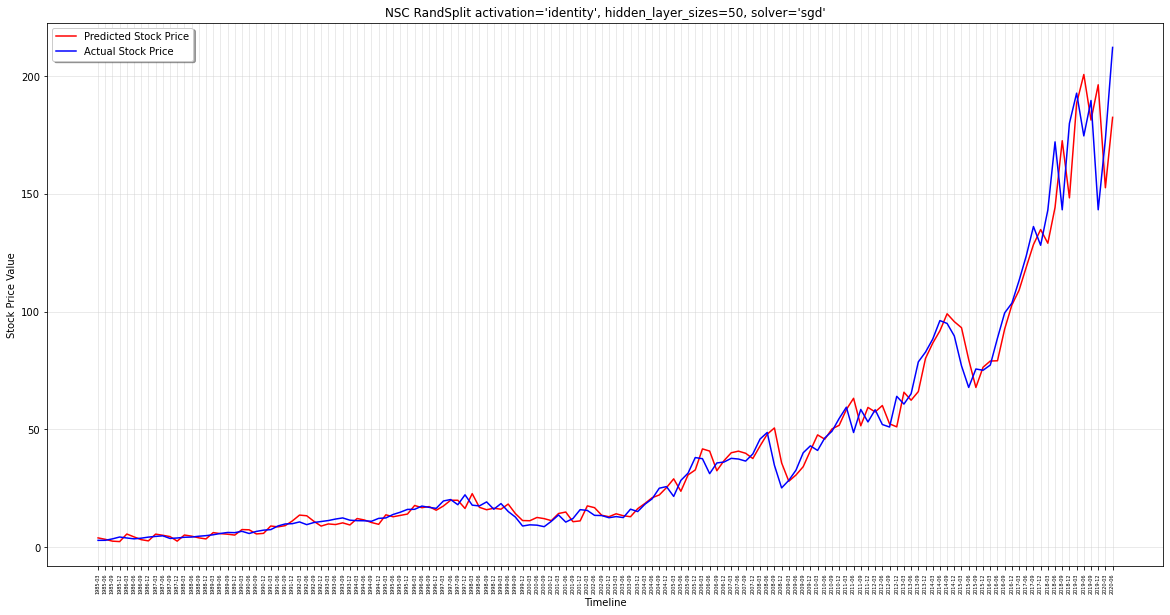

NSC MODEL RESULTS
 RMSE
 	Train: 9.411013988691138
 	Test: 3.62575488035036
 	Dataset: 8.559906486315205
 MAPE
 	Train: 0.13911732097920215
 	Test: 0.12449666010133578
 	Dataset: 0.1361522918501243
 R2 Score Adj
 	Train: 0.9666024432494593
 	Test: 0.9859924659753532
 	Dataset: 0.9692157407869815



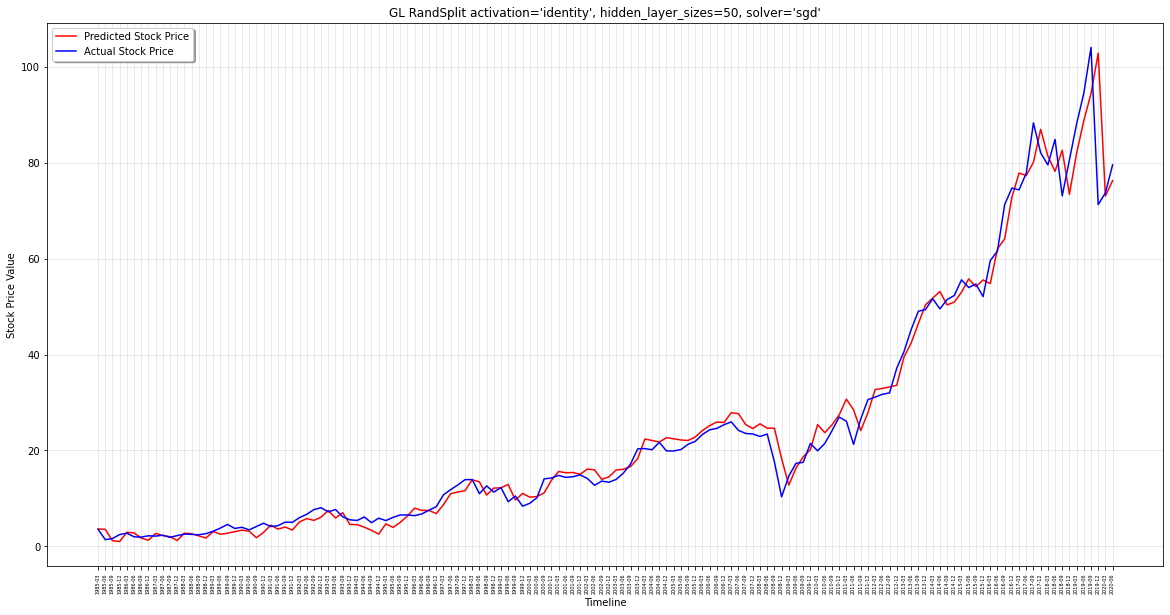

GL MODEL RESULTS
 RMSE
 	Train: 4.286789288482558
 	Test: 2.044114097451348
 	Dataset: 3.936650261199539
 MAPE
 	Train: 0.15512110445595878
 	Test: 0.12035429740511064
 	Dataset: 0.14807049323585672
 R2 Score Adj
 	Train: 0.9725885202036426
 	Test: 0.9881179619040341
 	Dataset: 0.9752864598972344



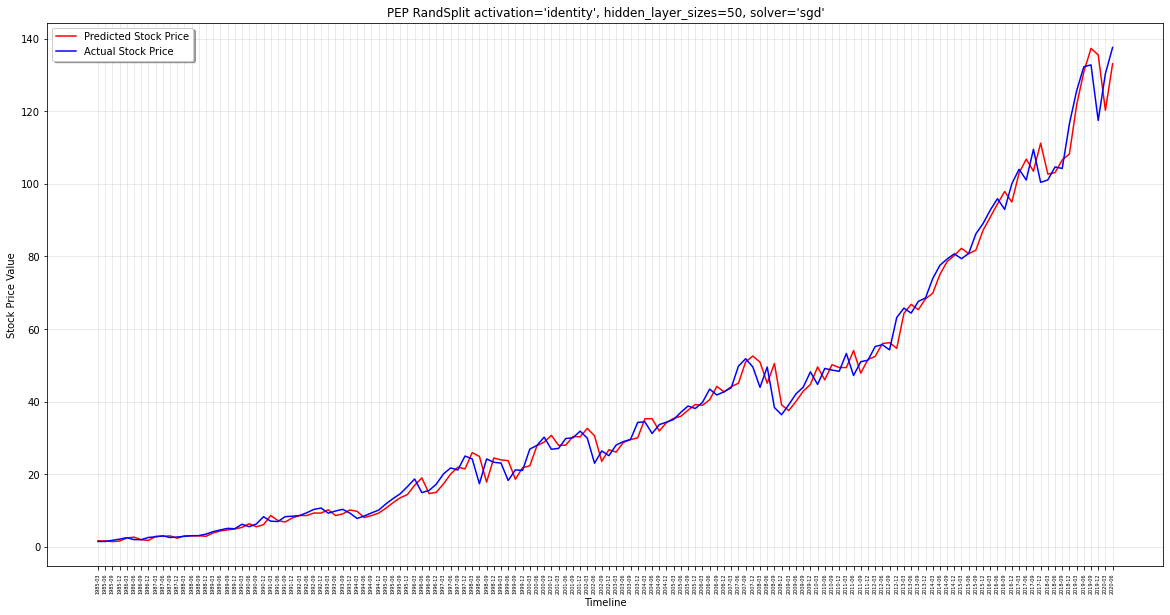

PEP MODEL RESULTS
 RMSE
 	Train: 3.786659357934541
 	Test: 2.3925543050203877
 	Dataset: 3.5484923653539506
 MAPE
 	Train: 0.08488269491852928
 	Test: 0.08030956774772982
 	Dataset: 0.08395527752025526
 R2 Score Adj
 	Train: 0.9893221565922431
 	Test: 0.9918159219694882
 	Dataset: 0.9899302536573652



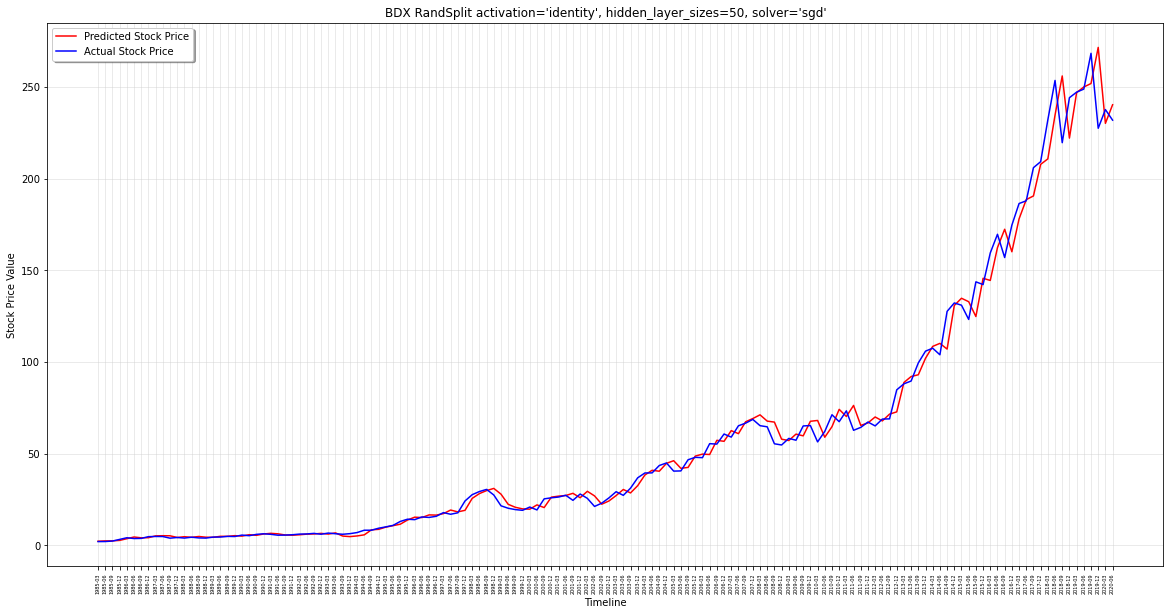

BDX MODEL RESULTS
 RMSE
 	Train: 8.15644270755167
 	Test: 5.406845565557591
 	Dataset: 7.678836123048715
 MAPE
 	Train: 0.08186880883941419
 	Test: 0.08546154539649384
 	Dataset: 0.0825974057635772
 R2 Score Adj
 	Train: 0.9873541869587885
 	Test: 0.9870149551050635
 	Dataset: 0.987685849474209



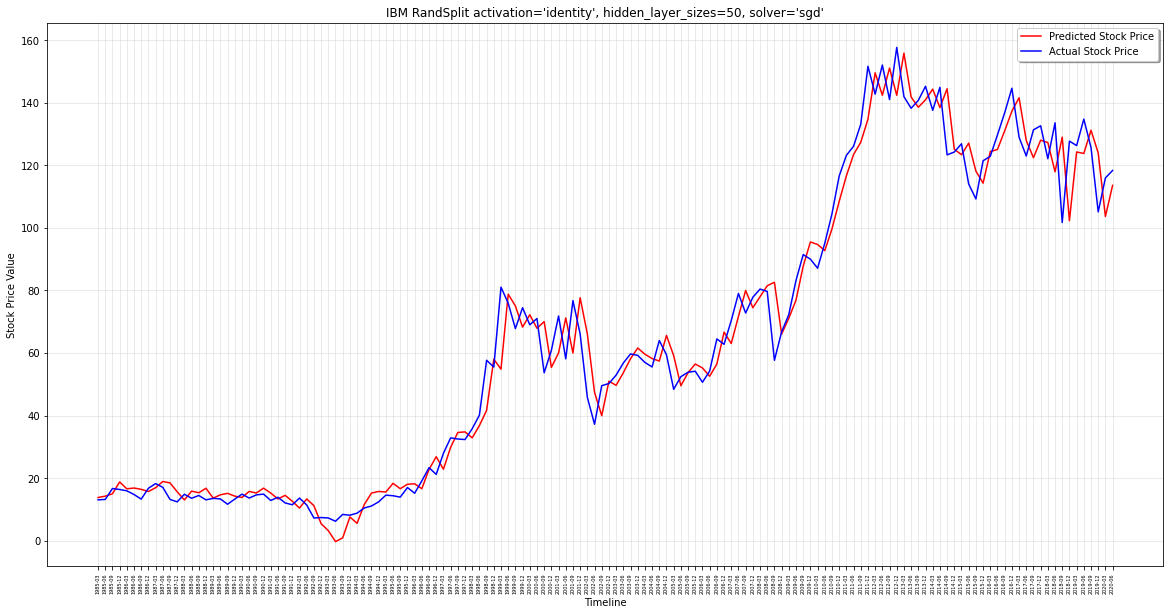

IBM MODEL RESULTS
 RMSE
 	Train: 8.676488119664787
 	Test: 4.83989657637455
 	Dataset: 8.047671870078199
 MAPE
 	Train: 0.1312581824600025
 	Test: 0.1269126174194672
 	Dataset: 0.13037691402520862
 R2 Score Adj
 	Train: 0.9663949195404402
 	Test: 0.983634202958976
 	Dataset: 0.9700716786581909



In [3]:
from lib.fundamental_lib import model_results
#Best Params
Params={'activation': 'identity', 'hidden_layer_sizes': 50, 'solver': 'sgd'}
mlp = MLPRegressor(activation=Params['activation'], hidden_layer_sizes=Params['hidden_layer_sizes'], solver=Params['solver'])
for stock in ['NSC', 'GL', 'PEP', 'BDX', 'IBM']:
    data = pd.read_csv(PATH+'{}_Manual_dataset.csv'.format(stock), header=0, index_col=0, low_memory=False)
    data.sort_index(ascending=True, inplace=True)
    model_results(data, mlp, label=stock, scaling=False)

## 3.2 Random split - Scaled prediction variable

In [ ]:
from lib.fundamental_lib import holdout
mlp = GridSearchCV(MLPRegressor(max_iter=100000), n_jobs=-1, error_score=1, 
                   param_grid={"hidden_layer_sizes": [(5,), (10,), (20,), (30,), (50,)],
                               "activation": ['identity', 'logistic', 'tanh', 'relu'],
                               "solver": ['sgd', 'adam']
                              },
                   scoring="neg_root_mean_squared_error"
)
data = pd.read_csv(PATH+'IBM_Manual_dataset.csv', header=0, index_col=0, low_memory=False)
data.sort_index(ascending=True, inplace=True)
holdout(data, mlp, scaling=True)

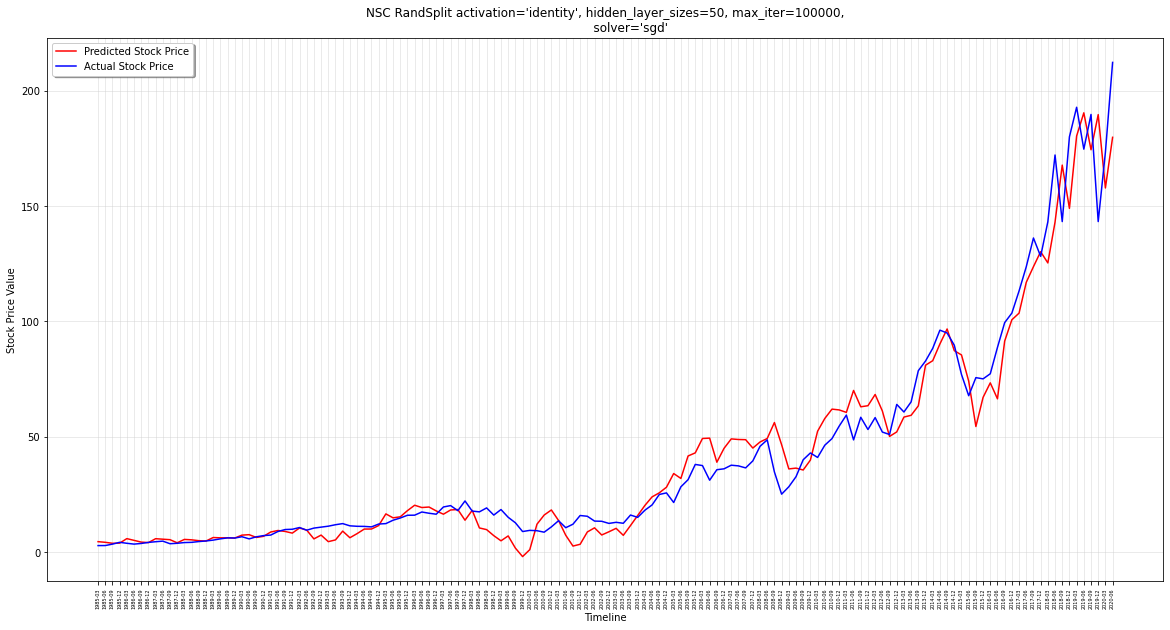

NSC MODEL RESULTS
 RMSE
 	Train: 10.733105529251754
 	Test: 6.685440269224448
 	Dataset: 10.044971405432534
 MAPE
 	Train: 0.2161263026836141
 	Test: 0.30277955867230816
 	Dataset: 0.23369934061139122
 R2 Score Adj
 	Train: 0.9565597158467838
 	Test: 0.9523761138221258
 	Dataset: 0.9576075929638588



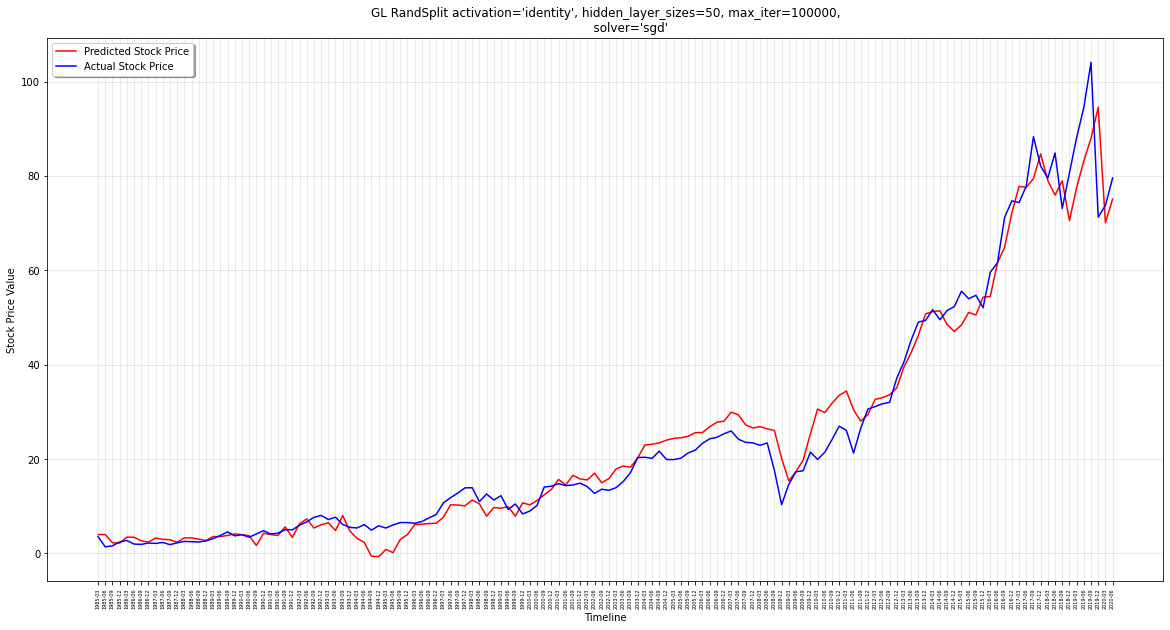

GL MODEL RESULTS
 RMSE
 	Train: 4.9201302089882315
 	Test: 3.157960981306664
 	Dataset: 4.6174528097524945
 MAPE
 	Train: 0.21131874719907576
 	Test: 0.20621630893119058
 	Dataset: 0.21028398699090323
 R2 Score Adj
 	Train: 0.964118269815198
 	Test: 0.9708937927644175
 	Dataset: 0.9659994278060348



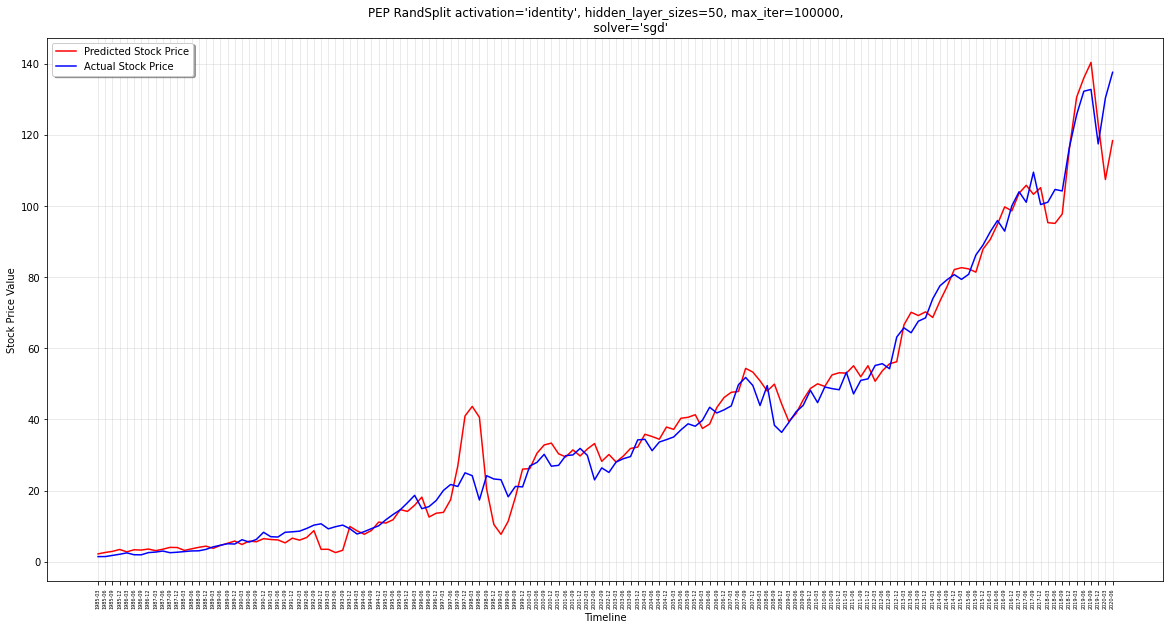

PEP MODEL RESULTS
 RMSE
 	Train: 6.119092334227299
 	Test: 4.127741259191081
 	Dataset: 5.771066221487257
 MAPE
 	Train: 0.17334488317861885
 	Test: 0.18348978513836323
 	Dataset: 0.17540224091870688
 R2 Score Adj
 	Train: 0.9697839281292653
 	Test: 0.983983662620578
 	Dataset: 0.9733656013377336



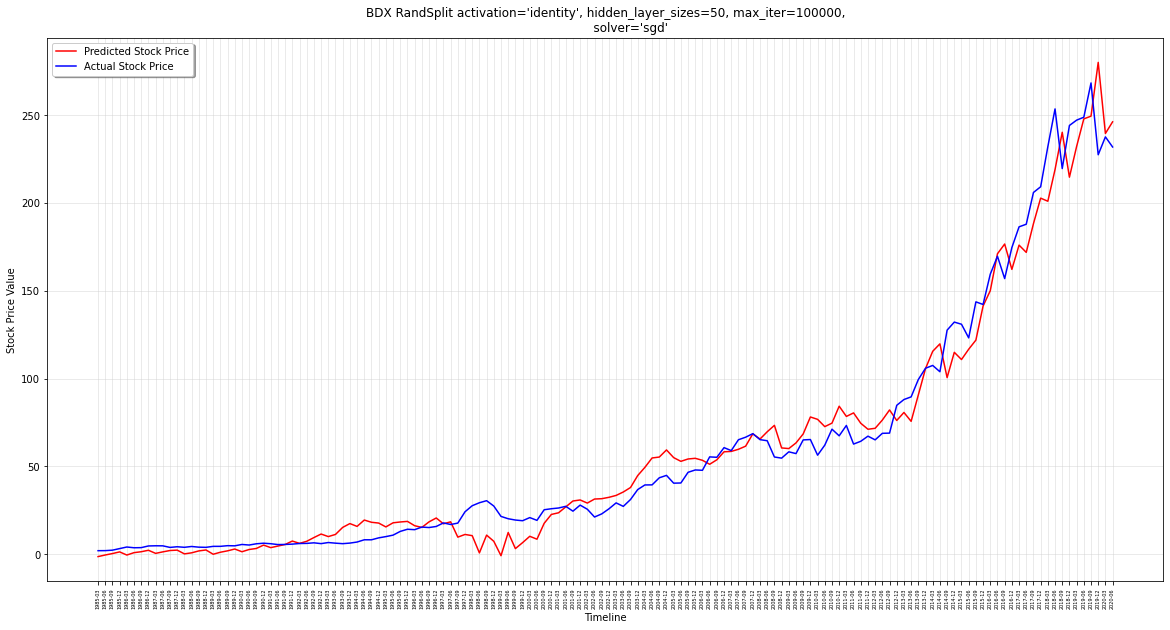

BDX MODEL RESULTS
 RMSE
 	Train: 11.769963628676052
 	Test: 11.19157819897999
 	Dataset: 11.654989102620014
 MAPE
 	Train: 0.3716357788490059
 	Test: 0.2968930424979652
 	Dataset: 0.3564781609876061
 R2 Score Adj
 	Train: 0.9722375823204465
 	Test: 0.9623131769650908
 	Dataset: 0.971631432701672



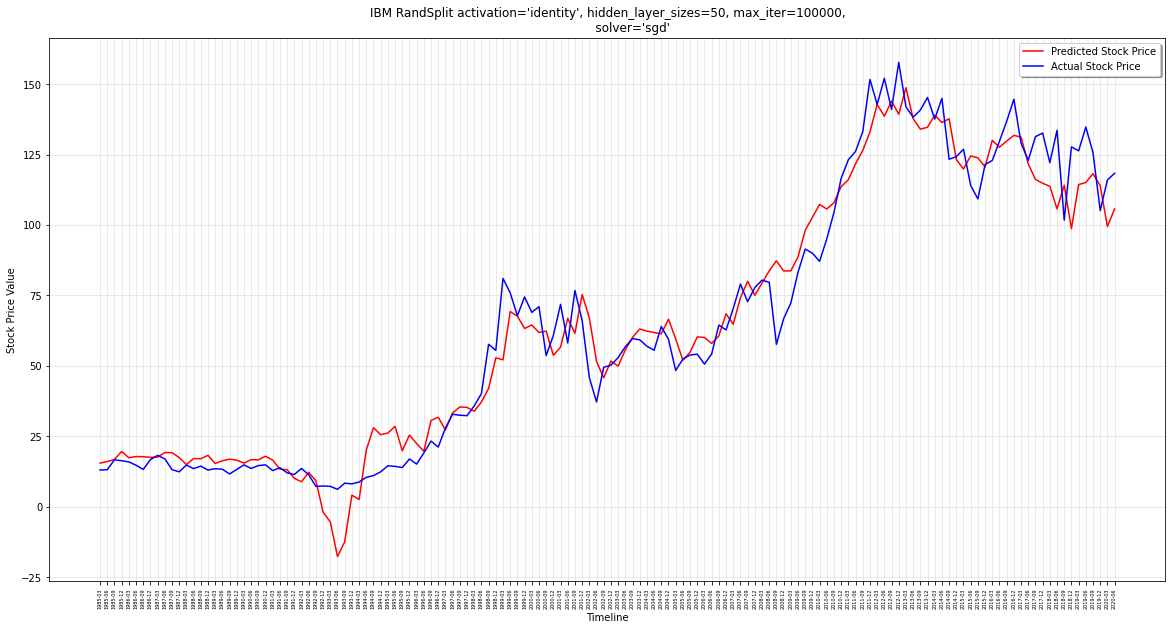

IBM MODEL RESULTS
 RMSE
 	Train: 10.480089869891168
 	Test: 7.430397237667083
 	Dataset: 9.937565104614947
 MAPE
 	Train: 0.24176303081439934
 	Test: 0.21704664708917384
 	Dataset: 0.2367506173316613
 R2 Score Adj
 	Train: 0.9464749724026009
 	Test: 0.9744626636801893
 	Dataset: 0.9543646052973228



In [6]:
from lib.fundamental_lib import model_results
#Best Params
Params={'activation': 'identity', 'hidden_layer_sizes': 50, 'solver': 'sgd'}
mlp = MLPRegressor(max_iter=100000, activation=Params['activation'], hidden_layer_sizes=Params['hidden_layer_sizes'], solver=Params['solver'])
for stock in ['NSC', 'GL', 'PEP', 'BDX', 'IBM']:
    data = pd.read_csv(PATH+'{}_Manual_dataset.csv'.format(stock), header=0, index_col=0, low_memory=False)
    data.sort_index(ascending=True, inplace=True)
    model_results(data, mlp, label=stock, scaling=True)

## 3.3 Sequential split - No scaled prediction variable

In [ ]:
from lib.fundamental_lib import holdout
mlp = GridSearchCV(MLPRegressor(max_iter=100000), n_jobs=-1, error_score=1, 
                   param_grid={"hidden_layer_sizes": [(5,), (10,), (20,), (30,), (50,)],
                               "activation": ['identity', 'logistic', 'tanh', 'relu'],
                               "solver": ['sgd', 'adam']
                              },
                   scoring="neg_root_mean_squared_error"
)
data = pd.read_csv(PATH+'IBM_Manual_dataset.csv', header=0, index_col=0, low_memory=False)
data.sort_index(ascending=True, inplace=True)
holdout(data, mlp, scaling=False, manual=True)

In [ ]:
from lib.fundamental_lib import model_results
#Best Params
Params={'activation': 'identity', 'hidden_layer_sizes': 50, 'solver': 'sgd'}
mlp = MLPRegressor(activation=Params['activation'], hidden_layer_sizes=Params['hidden_layer_sizes'], solver=Params['solver'])
for stock in ['NSC', 'GL', 'PEP', 'BDX', 'IBM']:
    data = pd.read_csv(PATH+'{}_Manual_dataset.csv'.format(stock), header=0, index_col=0, low_memory=False)
    data.sort_index(ascending=True, inplace=True)
    model_results_seq(data, mlp, label=stock, scaling=False)

## 3.4 Sequential split - Scaled prediction variable

In [ ]:
from lib.fundamental_lib import holdout
mlp = GridSearchCV(MLPRegressor(max_iter=100000), n_jobs=-1, error_score=1, 
                   param_grid={"hidden_layer_sizes": [(5,), (10,), (20,), (30,), (50,)],
                               "activation": ['identity', 'logistic', 'tanh', 'relu'],
                               "solver": ['sgd', 'adam']
                              },
                   scoring="neg_root_mean_squared_error"
)
data = pd.read_csv(PATH+'IBM_Manual_dataset.csv', header=0, index_col=0, low_memory=False)
data.sort_index(ascending=True, inplace=True)
holdout(data, mlp, scaling=True, manual=True)

In [ ]:
from lib.fundamental_lib import model_results
#Best Params
Params={'activation': 'identity', 'hidden_layer_sizes': 50, 'solver': 'sgd'}
mlp = MLPRegressor(activation=Params['activation'], hidden_layer_sizes=Params['hidden_layer_sizes'], solver=Params['solver'])
for stock in ['NSC', 'GL', 'PEP', 'BDX', 'IBM']:
    data = pd.read_csv(PATH+'{}_Manual_dataset.csv'.format(stock), header=0, index_col=0, low_memory=False)
    data.sort_index(ascending=True, inplace=True)
    model_results_seq(data, mlp, label=stock, scaling=True)

In [6]:
print(type((50,)))

<class 'tuple'>
